In [2]:
# 一些关于线性回归的测试
import numpy as np
X=2*np.random.rand(100,1)

In [2]:
y=4+3*X+np.random.rand(100,1)

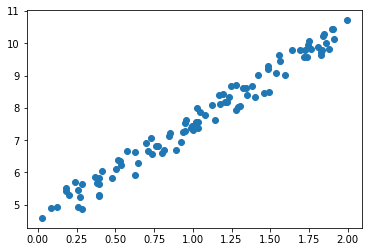

In [3]:
import matplotlib.pyplot as plt
plt.plot(X,y,'o')
plt.show()

In [4]:
# 现在去拟合系数
X_b=np.c_[np.ones((100,1)),X]
theta_best=np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [5]:
theta_best

array([[ 4.56329859],
       [ 2.97371319]])

In [7]:
x_new=np.array([[0],[2]])
x_new_b=np.c_[np.ones((2,1)),x_new]
y_predict=x_new_b.dot(theta_best)
y_predict # 这是为了画线，将两头的端点连接起来，之后形成的一条直线

array([[  4.56329859],
       [ 10.51072498]])

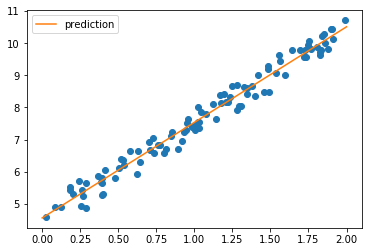

In [8]:
plt.plot(X,y,'o')
plt.plot(x_new,y_predict,label='prediction')
plt.legend(loc='upper left')
plt.show()

### 计算的复杂性（computational complexity）,在计算X.T.DOT(X)时，需要考虑计算的复杂性

# Batch Gradient Descent

In [13]:
eta=0.1
iterations=1000
m=100
theta=np.random.randn(2,1)
some_thetas=np.empty((2,1))
for iteration in range(iterations):
    gradient=2/m*X_b.T.dot(X_b.dot(theta)-y)
    theta=theta-eta*gradient
    if iteration%10==0:
        some_thetas=np.c_[some_thetas,theta]

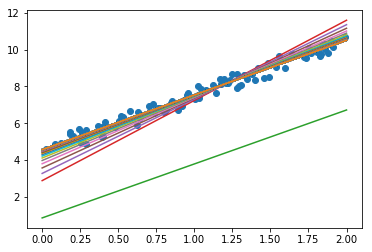

In [14]:
y_predicts=x_new_b.dot(some_thetas)
plt.plot(X,y,'o')
for i in range(y_predicts.shape[1]):
       plt.plot(x_new,y_predicts[:,i].T)
plt.show()
plt.close()

# Stochastic Gradient Descent

In [15]:
n_epochs=50
t0,t1=5,50
def learnrate(t):
    return t0/(t+t1)
theta=np.random.randn(2,1)
some_thetas=np.empty((2,1))
for epoch in range(n_epochs):
    for i in range(m):
        rand_ix=np.random.randint(m)
        X_i=X_b[rand_ix:rand_ix+1]
        y_i=y[rand_ix:rand_ix+1]
        gradient=2*X_i.T.dot(X_i.dot(theta)-y_i)
        eta=learnrate(epoch*m+i)
        theta=theta-eta*gradient
        if i%25==0:
            some_thetas=np.c_[some_thetas,theta]

In [16]:
theta

array([[ 4.54602389],
       [ 2.98405684]])

In [17]:
y_lines=x_new_b.dot(some_thetas)

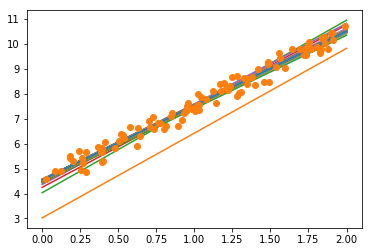

In [18]:
for i in range(y_lines.shape[1]): 
    plt.plot(x_new,y_lines[:,i].T)
plt.plot(X,y,'o')
plt.show()

### Sklearn 中的SGDLinear 

In [19]:
from sklearn.linear_model import SGDRegressor
sgdr=SGDRegressor(max_iter=50,penalty=None,eta0=0.1)
sgdr.fit(X,y)

C:\Users\yzy\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.1,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=50, n_iter=None, penalty=None,
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [20]:
sgdr.intercept_,sgdr.coef_

(array([ 4.57591257]), array([ 2.98526409]))

# Polynomial Regression

In [21]:
m=100
X=6*np.random.rand(m,1)-3
y=0.5*X**2+X+2+np.random.rand(m,1)

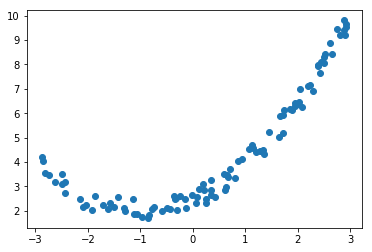

In [22]:
plt.plot(X,y,'o')
plt.show()
plt.close()

In [23]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2,include_bias=False)
X_poly=poly.fit_transform(X)

In [24]:
from sklearn.linear_model import LinearRegression
liner=LinearRegression()
liner.fit(X_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [25]:
liner.coef_

array([[ 0.99778825,  0.50151065]])

### 0.9948这个系数与1很接近了，0.4955与0.5也很接近了，我们把图画一下

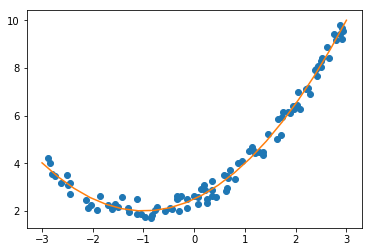

In [28]:
x_line=np.linspace(-3,3,20)
y_line=liner.coef_[0,0]*x_line+liner.coef_[0,1]*x_line**2+liner.intercept_
plt.plot(X,y,'o')
plt.plot(x_line,y_line)
plt.show()
plt.close()

# Learning Curve

In [29]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
def plot_learning_curve(model,X,y):
    X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.2)
    mse_train,mse_val=[],[]
    for m in range(1,(len(X_train)+1)):
        model.fit(X_train[:m],y_train[:m])
        y_pre_train=model.predict(X_train[:m])
        y_pre_val=model.predict(X_val)
        mse_train.append(mean_squared_error(y_train[:m],y_pre_train))
        mse_val.append(mean_squared_error(y_val,y_pre_val))
    plt.plot(np.sqrt(mse_train),'r*',label='RMSE_TRAIN')
    plt.plot(np.sqrt(mse_val),'b-',label='RMSE_VAL')        

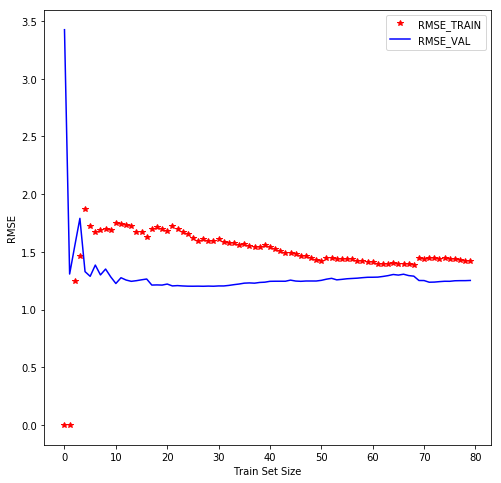

In [31]:
liner=LinearRegression()
plt.figure(figsize=(8,8))
plot_learning_curve(liner,X,y)
plt.legend(loc='upper right')
plt.xlabel('Train Set Size')
plt.ylabel('RMSE')
plt.show()

In [32]:
from sklearn.pipeline import Pipeline
pipeline_regress=Pipeline(
    (
        ('poly',PolynomialFeatures(degree=10,include_bias=False)),
        ('line_regre',LinearRegression())
    )
)

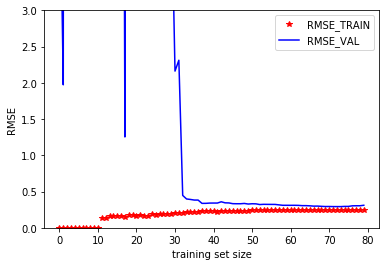

In [33]:
plot_learning_curve(pipeline_regress,X,y)
plt.legend(loc='upper right')
plt.ylim((0,3))
plt.xlabel('training set size')
plt.ylabel('RMSE')
plt.show()
plt.close()

### 可以看到将degree换成10之后，效果奇差无比，对比上面两幅图，可以明显的看到，只有选择了好的model,才能使得两条曲线最终拟合到一个比较好的形状

# Ridge Regression

In [34]:
from sklearn.linear_model import Ridge
from sklearn.grid_search import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=10,include_bias=False)
x_ploy=poly.fit_transform(X)
ridge=Ridge(solver='cholesky')
parameter_ridge={'alpha':[1,10,100,1000]}
grid_ridge=GridSearchCV(param_grid=parameter_ridge,estimator=ridge)
grid_ridge.fit(x_ploy,y)

C:\Users\yzy\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\yzy\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


GridSearchCV(cv=None, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='cholesky', tol=0.001),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'alpha': [1, 10, 100, 1000]}, pre_dispatch='2*n_jobs',
       refit=True, scoring=None, verbose=0)

In [35]:
x_new=np.array([np.linspace(-3,3,100)]).T
x_new_degree=poly.fit_transform(x_new)
predict=[]
for i in [0.0001,1,10,100,1000]:
    ridge=Ridge(alpha=i,solver='cholesky')
    ridge.fit(x_ploy,y)
    predict.append(ridge.predict(x_new_degree))

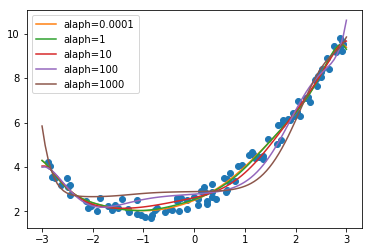

In [36]:
plt.plot(X,y,'o')
plt.plot(x_new,predict[0],label='alaph=0.0001')
plt.plot(x_new,predict[1],label='alaph=1')
plt.plot(x_new,predict[2],label='alaph=10')
plt.plot(x_new,predict[3],label='alaph=100')
plt.plot(x_new,predict[4],label='alaph=1000')
plt.legend(loc='upper left')
plt.show()

In [39]:
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
ridge=Ridge(alpha=1,solver='cholesky')
ridge.fit(X,y)
ridge.predict([X[1]])

array([[ 6.23309453]])

In [47]:
sgdr_l2=SGDRegressor(penalty='l2',alpha=1)
sgdr_l2.fit(X,y.ravel())
sgdr_l2.predict([X[1]])

C:\Users\yzy\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


array([ 4.95130658])

### 以上两种实质上是一样的

In [48]:
lasso=Lasso(alpha=1)
lasso.fit(X,y)
lasso.predict([X[1]])

array([ 5.67696489])

In [50]:
sgdr_l1=SGDRegressor(penalty='l1',alpha=1)
sgdr_l1.fit(X,y.ravel())
sgdr_l1.predict([X[1]])

C:\Users\yzy\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


array([ 5.00343694])

### 上面两种也是一样的，原理一样，但是在实际应用中，肯定要用的是SGDREGRESSOR,因为设计到批量的迭代问题。RIDEG 和LASSO 都是直接对所有的数据进行计算，所以效率会低一点。

In [56]:
from sklearn.linear_model import ElasticNet
elestic_r=ElasticNet(alpha=1,l1_ratio=0.5)
elestic_r.fit(X,y)
elestic_r.predict([X[1]])

array([ 5.72255029])

### 这里一个tips:
    在进行选择模型选择时，尽量避免直接选用线性模型，从Ridge回归开始是一个很好的选择
    当怀疑只有一些特征可以使用的时候，最好使用LASSO或者Elastic Net
    当特征数量大于实例数量时候，选用Elastic Net要更好一点
    在挑选超参数时，尽量使用grid search

In [71]:
from sklearn.base import clone
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train,X_val,y_train,y_val=train_test_split(X_poly,y,test_size=0.2)
std=StandardScaler()
X_train_poly=std.fit_transform(X_train)
X_val_std=std.fit_transform(X_val)
sgd_reg = SGDRegressor(max_iter=1, warm_start=True, penalty=None,learning_rate="constant", eta0=0.0005)
minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
   sgd_reg.fit(X_train_poly, y_train.ravel()) # continues where it left off
   y_val_predict = sgd_reg.predict(X_val_std)
   val_error = mean_squared_error(y_val_predict, y_val)
   if val_error < minimum_val_error:
         minimum_val_error = val_error
         best_epoch = epoch
         best_model = clone(sgd_reg)

In [73]:
minimum_val_error
best_epoch

944

# Logistic Regressor

In [3]:
from sklearn import datasets
iris=datasets.load_iris()
X=iris.data[:,3:]
y=(iris.target==2).astype(np.int)

In [4]:
from sklearn.linear_model import LogisticRegression
logis_c=LogisticRegression()
logis_c.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

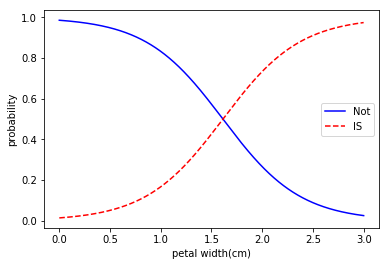

In [6]:
import matplotlib.pyplot as plt
x_new=np.array([np.linspace(0,3,1000)]).T
y_predict=logis_c.predict_proba(x_new)
plt.plot(x_new,y_predict[:,0],'b-',label='Not')
plt.plot(x_new,y_predict[:,1],'r--',label='IS')
plt.xlabel('petal width(cm)')
plt.ylabel('probability')
plt.legend(loc='right')
plt.show()
plt.close()

### 可以看到，当petel 的宽度大于1.5之后，基本上就被分类为属于该种花了

### Logistic Model 依旧可以加入L1和L2惩罚系数

# Softmax Regression

In [15]:
from sklearn.linear_model import LogisticRegression
soft_r=LogisticRegression(multi_class='multinomial',solver='lbfgs')
soft_r.fit(iris.data[:,(2,3)],iris.target)
soft_r.predict([[2,5]])

array([2])

In [16]:
soft_r.predict_proba([[2,5]])

array([[ 0.15819366,  0.06405899,  0.77774735]])

## Softmax Regression在Scikit-Learn中没有直接的函数，可以通过设置LogisticRegression中的multi_class来变为SoftMax Regression,LogisticRegression默认的是ovr的一对多分类